In [1]:
%matplotlib inline

import skimage
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, util

plt.rcParams['figure.figsize'] = (10.0, 8.0)

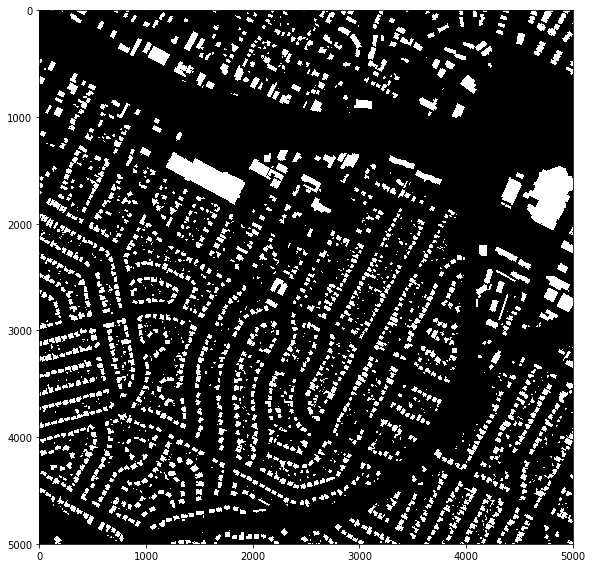

(5000, 5000)


In [2]:
test = skimage.io.imread('/media/dennis/HDD/AerialImageDataset/train/gt/austin1.tif')
io.imshow(test)
io.show()
print(test.shape)

In [3]:
cropped = []
crop_size = 500
for i in range(10):
    for j in range(10):
        cropped.append(test[crop_size*i:crop_size*(i+1), crop_size*j:crop_size*(j+1), :])
fig, axs = plt.subplots(5,5)
for ax, im in zip(axs.flatten().tolist(), cropped):
    ax.imshow(im)

IndexError: too many indices for array

In [3]:
image_path = '/media/dennis/HDD/AerialImageDataset/train/images/'
gt_path = '/media/dennis/HDD/AerialImageDataset/train/gt/'
image_list = os.listdir(image_path)
gt_list = os.listdir(gt_path)
print(image_list)
print(gt_list)

['austin1.tif', 'austin10.tif', 'austin11.tif', 'austin12.tif', 'austin13.tif', 'austin14.tif', 'austin15.tif', 'austin16.tif', 'austin17.tif', 'austin18.tif', 'austin19.tif', 'austin2.tif', 'austin20.tif', 'austin21.tif', 'austin22.tif', 'austin23.tif', 'austin24.tif', 'austin25.tif', 'austin27.tif', 'austin28.tif', 'austin29.tif', 'austin3.tif', 'austin30.tif', 'austin31.tif', 'austin32.tif', 'austin33.tif', 'austin34.tif', 'austin35.tif', 'austin36.tif', 'austin4.tif', 'austin5.tif', 'austin6.tif', 'austin7.tif', 'austin8.tif', 'austin9.tif', 'chicago1.tif', 'chicago11.tif', 'chicago12.tif', 'chicago13.tif', 'chicago14.tif', 'chicago15.tif', 'chicago16.tif', 'chicago17.tif', 'chicago18.tif', 'chicago19.tif', 'chicago2.tif', 'chicago20.tif', 'chicago21.tif', 'chicago22.tif', 'chicago23.tif', 'chicago24.tif', 'chicago25.tif', 'chicago26.tif', 'chicago28.tif', 'chicago29.tif', 'chicago3.tif', 'chicago30.tif', 'chicago31.tif', 'chicago32.tif', 'chicago33.tif', 'chicago34.tif', 'chicago3

In [4]:
# train_data_path = '/media/dennis/HDD/AerialImageDataset/train/train_data/'
# train_label_path = '/media/dennis/HDD/AerialImageDataset/train/train_label/'
# val_data_path = '/media/dennis/HDD/AerialImageDataset/train/val_data/'
# val_label_path = '/media/dennis/HDD/AerialImageDataset/train/val_label/'
train_data_path = '/media/dennis/HDD/AerialImageDataset/train/512/train_data/'
train_label_path = '/media/dennis/HDD/AerialImageDataset/train/512/train_label/'
val_data_path = '/media/dennis/HDD/AerialImageDataset/train/512/val_data/'
val_label_path = '/media/dennis/HDD/AerialImageDataset/train/512/val_label/'

In [5]:
def crop_image(image, crop_size=512):
    assert (image.shape[0], image.shape[1]) == (5000, 5000)
    cropped = []
    for i in range(9):
        for j in range(9):
            try:
                cropped.append(image[crop_size*i:crop_size*(i+1), crop_size*j:crop_size*(j+1), :])
            except:
                cropped.append(image[crop_size*i:crop_size*(i+1), crop_size*j:crop_size*(j+1)])
        try:
            cropped.append(image[crop_size*i:crop_size*(i+1), -crop_size:, :])
        except:
            cropped.append(image[crop_size*i:crop_size*(i+1), -crop_size:])
    for k in range(9):
        try:
            cropped.append(image[-crop_size:, crop_size*k:crop_size*(k+1), :])
        except:
            cropped.append(image[-crop_size:, crop_size*k:crop_size*(k+1)])
    try:
        cropped.append(image[-crop_size:, -crop_size:, :])
    except:
        cropped.append(image[-crop_size:, -crop_size:])
    return cropped

In [6]:
train_file_name = 0
val_file_name = 0
for im in image_list:
    gt_f = io.imread(gt_path + im)
    im_f = io.imread(image_path + im)
    gt_cropped = crop_image(gt_f)
    im_cropped = crop_image(im_f)
    for i, (gt_c, im_c) in enumerate(zip(gt_cropped, im_cropped)):
        if i < 5:
            gt_save_path = val_label_path + str(val_file_name) + '.tif'
            data_save_path = val_data_path + str(val_file_name) + '.tif'
            val_file_name += 1
        else:
            gt_save_path = train_label_path + str(train_file_name) + '.tif'
            data_save_path = train_data_path + str(train_file_name) + '.tif'
            train_file_name += 1
        io.imsave(gt_save_path, gt_c)
        io.imsave(data_save_path, im_c)

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImag

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/138.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/140.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/142.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/143.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/Aer

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/537.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/556.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/566.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/567.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/Aer

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1035.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1042.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1043.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1044.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1479.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1486.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1489.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1500.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1764.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1765.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1766.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1767.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1807.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1808.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1809.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/1838.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2227.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2228.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2232.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2233.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2316.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2317.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2326.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2327.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2449.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2450.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2451.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2452.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2682.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2683.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2684.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2692.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2869.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2870.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2871.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/2872.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3001.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3007.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3008.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3009.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3410.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3411.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3412.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3414.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWa

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3701.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3702.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3703.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3751.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3940.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3950.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/3981.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/210.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/Ae

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/4742.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/4955.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/4958.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/4971.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/5579.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/5584.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/5594.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/5599.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/5913.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/5914.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/5985.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/5986.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6490.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6491.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6492.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6501.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6589.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6590.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6591.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6592.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6633.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6634.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6635.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6636.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6683.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6684.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6685.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6686.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6834.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6860.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6930.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/6931.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7175.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7178.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7185.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7186.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7252.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7253.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7254.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7255.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/385.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/386.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/387.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/388.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImage

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7512.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7517.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7526.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7534.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7620.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7624.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7627.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7629.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7755.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7765.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7766.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7769.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7837.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7839.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7845.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7846.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7973.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7974.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7975.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/7979.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8157.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8158.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8159.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8163.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8296.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8298.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8300.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8301.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8352.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8353.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8355.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8356.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8441.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/445.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/447.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/448.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialIm

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8510.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8511.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8512.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8513.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8590.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8591.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8600.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8601.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8690.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8691.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8700.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8701.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8888.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8889.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/8894.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_data/8894.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9031.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9032.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9037.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9039.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9159.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9160.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9163.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9172.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9290.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9299.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9300.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9301.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9512.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9523.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9524.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9529.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9647.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_data/9647.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9648.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_data/9648.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/A

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9719.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9720.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9727.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9728.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9793.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9794.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9795.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9799.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9903.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9904.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9913.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/9914.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10008.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10009.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10011.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10012.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10055.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10056.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10057.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10060.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10118.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10121.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10122.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10123.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10169.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10170.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10176.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10177.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/540.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/541.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/542.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/543.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImage

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10312.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10315.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10316.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10318.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10383.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10384.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10385.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10386.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10440.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10441.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10442.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10443.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10516.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10518.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10519.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10520.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10570.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10571.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10572.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10573.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10661.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10662.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10663.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10664.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10707.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10708.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10709.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10710.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10750.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10751.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10752.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10753.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10811.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10812.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10813.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10814.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10857.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10858.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10859.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10860.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10924.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/575.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/576.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/577.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialI

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10980.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10985.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10986.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/10990.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11078.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11079.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11080.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11081.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11122.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11123.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11124.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11125.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11200.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11201.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11202.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11203.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11288.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11289.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11290.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11291.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11367.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11368.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11369.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11373.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11404.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11405.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11406.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11407.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11442.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11443.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11444.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11445.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11514.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11515.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11516.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11517.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11578.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_data/11578.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11579.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_data/11579.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/H

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11613.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11614.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11615.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11616.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11658.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11659.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11660.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11661.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11827.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11828.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11829.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11830.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11920.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11921.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11934.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11935.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11976.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11977.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11978.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/11985.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12069.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12070.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12071.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12072.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12148.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12149.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12150.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12152.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12204.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12207.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12208.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12212.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12268.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12269.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12270.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12271.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12325.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12326.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12327.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12328.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12390.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12391.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12392.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12400.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12547.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12557.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12567.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12568.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12650.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12652.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12653.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12654.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12767.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12768.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12769.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12770.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12820.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12821.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12822.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12823.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12875.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12876.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12877.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12878.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/680.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/681.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/682.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/683.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImage

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12965.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12966.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12967.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/12968.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13015.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13016.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13018.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13019.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13085.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13086.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13087.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13088.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13123.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13124.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13125.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13126.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13184.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13185.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13195.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13196.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13265.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13266.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13267.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13268.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13328.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13329.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13330.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13331.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13394.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13395.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13396.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13397.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13467.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13468.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13470.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13471.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13527.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13528.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13529.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13530.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13589.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13590.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13591.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13592.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13650.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13656.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13657.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13658.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13711.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13715.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13716.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13717.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13773.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13774.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13845.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/13856.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/14123.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/14124.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_data/14124.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/14136.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/14582.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/14583.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/14584.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/14585.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/15164.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/15170.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/15171.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/15176.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/15341.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/15342.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/15343.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/15352.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16195.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16196.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16197.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16198.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16335.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16336.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16371.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16372.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16621.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16622.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/val_label/879.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16625.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16726.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16735.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16745.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis/HDD/AerialImageDataset/train/512/train_label/16746.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /media/dennis

In [5]:
image_list == gt_list

False

In [7]:
for gt in gt_list:
    if gt not in image_list:
        print(gt)

In [8]:
for im in image_list:
    if im not in gt_list:
        print(im)